In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

In [69]:
inputFile = './data/house5/channel_7.dat'
file_read = pd.read_csv(inputFile, sep=' ', names = ['Timestamp','Usage']) 
#dateData = np.forfile_read['Timestamp'])
#timestampArray = np.array(file_read['Timestamp']).reshape(-1,1)
#convertedTime = np.apply_along_axis(datetime.fromtimestamp, 1, timestampArray)
#dataDate = convertedTime[]

#print(file_read['Timestamp'])
#file_read = pd.DataFrame(file_read)
#file_read = pd.DataFrame(file_read.row.str.split(' ',1).tolist(), columns = ["Timestamp","Usage"])
#file_read['Timestamp'], file_read['Usage'] = zip(*file_read['Timestamp'].map(lambda x: x.split(' ')))

In [104]:
file_read['Timestamp'] = pd.to_datetime(file_read['Timestamp'],unit='s')
file_read['Year'] = file_read['Timestamp'].dt.year
file_read['Month'] = file_read['Timestamp'].dt.month
file_read['Day'] = file_read['Timestamp'].dt.day
file_read['Hour'] = file_read['Timestamp'].dt.hour
file_read['Minute'] = file_read['Timestamp'].dt.minute
file_read['Second'] = file_read['Timestamp'].dt.second
file_read.to_csv(inputFile+'.csv', sep=',')

In [105]:
print (type(file_read['Year'][0]))
#print(file_read)

<class 'numpy.int64'>


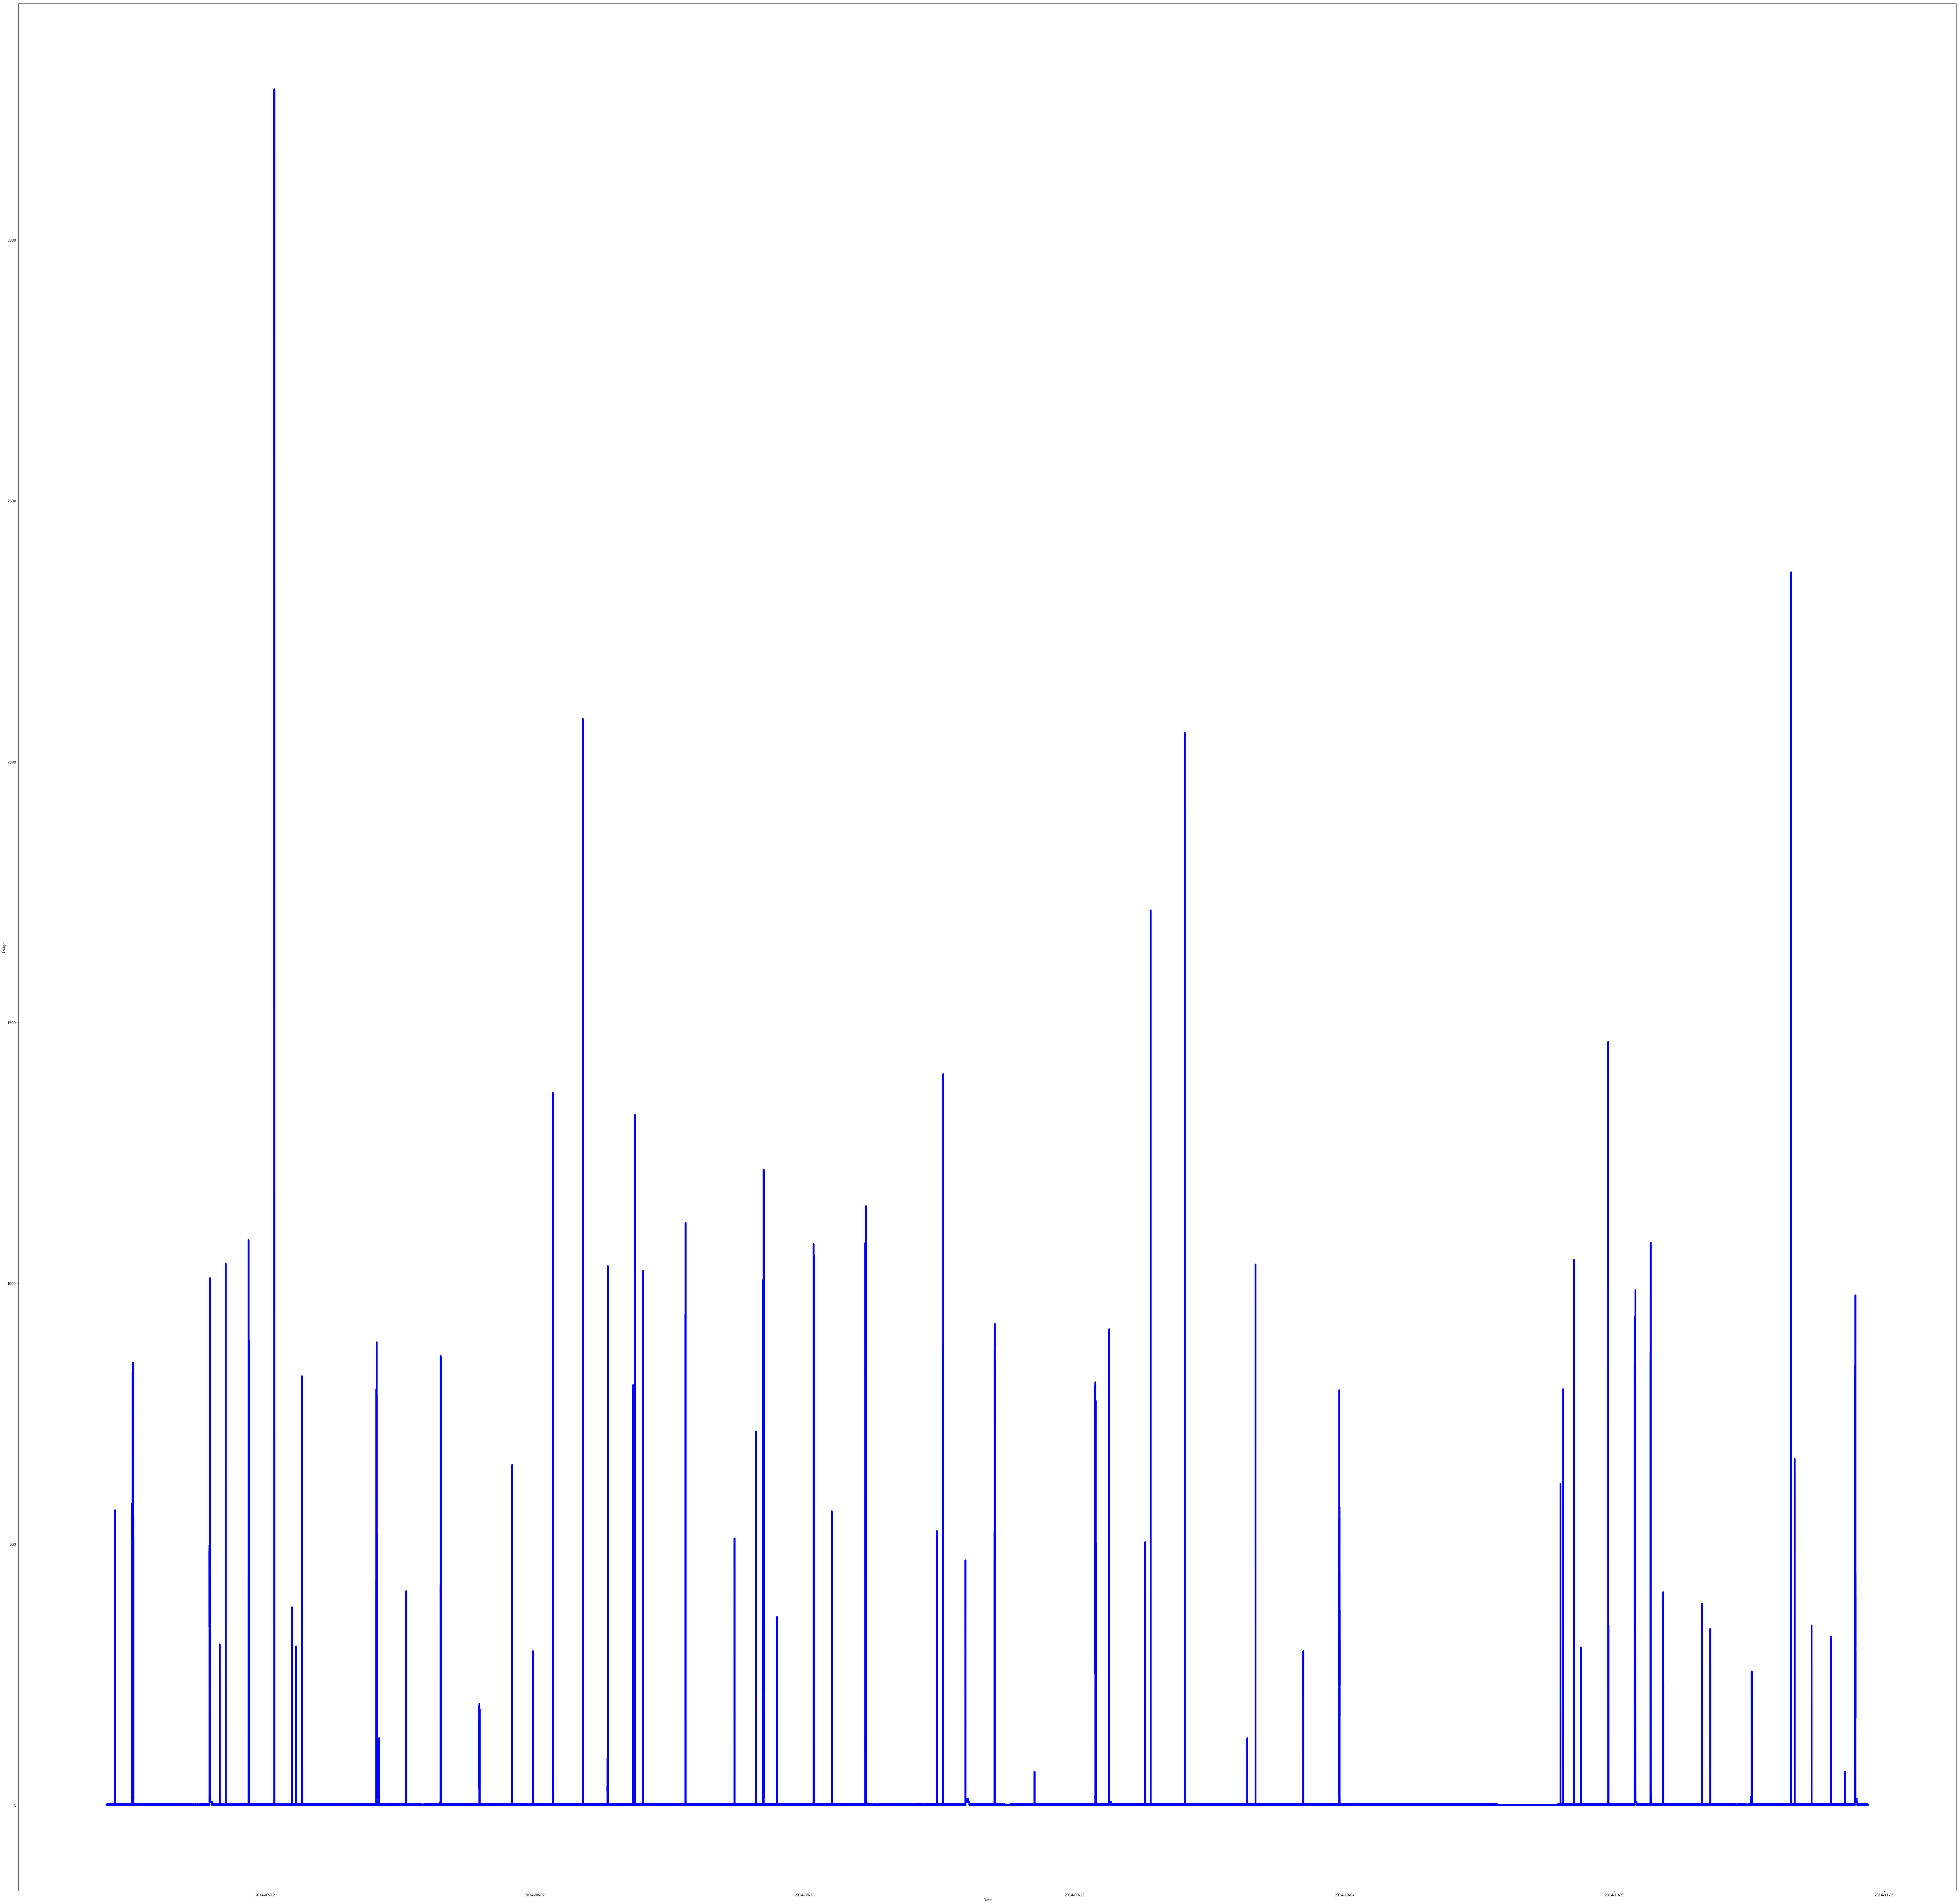

In [115]:
plt.figure(figsize=(100,100))
plt.xlabel('Date')
plt.ylabel('Usage')
plt.interactive(True)
plt.ion()
plt.plot(file_read['Timestamp'], file_read['Usage'], color='blue', linewidth=5)
#plt.draw()
plt.show(block=False)
#plt.savefig('timestamp.png')

In [ ]:
plt.plot(file_read['Month'], file_read['Usage'], color='blue', linewidth=3)
plt.show(block=False)
plt.plot(file_read['Day'], file_read['Usage'], color='blue', linewidth=3)
plt.show(block=False)
plt.scatter(file_read['Hour'], file_read['Usage'], color='blue', linewidth=3)
plt.show(block=False)
plt.scatter(file_read['Minute'], file_read['Usage'], color='blue', linewidth=3)
plt.show(block=False)
plt.scatter(file_read['Second'], file_read['Usage'], color='blue', linewidth=3)
plt.show(block=False)

In [122]:
#del file_read['Timestamp']
train, validate, test = np.split(file_read.sample(frac=1), [int(.6*len(file_read)), int(.8*len(file_read))])
print(train['Usage'].size, ' ' , train['Usage'].size)
print(test['Usage'].size, ' ' , test['Usage'].size)
#print(train['Timestamp'], train['Usage'])

KeyError: 'Timestamp'

In [6]:
#plt.plot(train)
#plt.ylabel('some numbers')
#plt.show()

In [12]:
train_x, train_y = np.hsplit(train, 2)
test_x, test_y = np.hsplit(test, 2)
time1 = datetime.fromtimestamp(train_x)
print(time1)
#print(train_x)
#print(train_y)

TypeError: an integer is required (got type DataFrame)

In [8]:
reg = linear_model.LinearRegression()
reg.fit (train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
test_predict = reg.predict(test_x)
print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(test_y, test_predict))
print('Variance score: %.2f' % r2_score(test_y, test_predict))
#print(test_y, test_predict)

Coefficients: 
 [[ -8.24559024e-08]]
Mean squared error: 534.69
Variance score: 0.00


In [ ]:
# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, test_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()